# Setting up a Craft Beer Brewery 

### Introduction
Craft beer or Freshly brewed beer or organic beer is getting popularity very quickly in India. Freshly brewed beer are chemical free, preservative free, essence free and glycerin free. 
	Besides being fresh a Craft beer also gives a chance to people to taste new flavors, new kinds of beer and most importantly get a beer with local ingredients e.g. Ragi (locally grown Finger Millet)beer, local fruit flavored etc…
	With the increasing demand a number of breweries are mushrooming in major cities like Mumbai, Bangalore, Delhi, Pune and Chandigarh. A study revealed that in 2018 there were around 60 micro breweries in India and the growth rate of such breweries is 100% year on year since 2016.

### Business Need
There are many new vendors who are interested to setup breweries to cater to rocketing demands in India. 
	Existing vendors, based on the past growth numbers, would also like to extend the craft beer experience from micro-breweries dine-in to freshly brewed craft beer in bars of hotel, restaurants and pubs.
	This requires breweries to be located at strategic locations to supply freshly crafted beer to the customers at hotels, restaurants and pubs. 
Craft beer does not have preservatives so it should replenished quickly and regularly
Hence, the breweries should be near hotels, restaurants and pubs to reduce the cost of transportation as well as reduce operating margins



In [1]:
import requests
import pandas as pd
import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



#### Install geopy to get the latitude and longitude data 

In [2]:
!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

#### Install BeautifulSoup4 to make the results readable 

In [3]:
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge et_xmlfile --yes
!conda install -c conda-forge BeautifulSoup4 --yes                         

#if update is required for the module 
!conda update -n base -c defaults BeautifulSoup4 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lxml-4.4.1                 |   py36h7ec2d77_0         1.6 MB  conda-forge

The following packages will be UPDATED:

    lxml: 4.2.5-py37hefd8a0e_0 --> 4.4.1-py36h7ec2d77_0 conda-forge


lxml-4.4.1           | 1.6 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ cond

#### Get names of all the major localities of Bangalore 

In [4]:
localities_blr = requests.get("https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore").text
#print(localities_blr)

#### Format the results to make it readable

In [5]:
#read the page and print the soup 
from bs4 import BeautifulSoup
soup = BeautifulSoup(localities_blr,"lxml")
#print(soup.prettify())
My_table = soup.findAll('table',{'class':'wikitable sortable'})
#print(My_table)

#### Parse the results to get the name of the localities in Bangalore

In [6]:
row_list = []
blr_local = pd.DataFrame()
for ind, tab in enumerate(My_table):
    #print(ind, tab)
    
    for i, row in enumerate(tab.findAll("tr")):

        for j,col in enumerate(row.findAll('td')):

            if j==0:
                
                area_name = col.find('a').contents[0]
                
                #print(j, area_name)
                if(len(area_name)>0):
                    row_list.append(area_name.string)
    blr_local = pd.DataFrame(row_list)
    blr_local.columns= ['Localities']
########################################################################################################
#Adjusted the names as the data scraped from wikipedia do not have the format which is expected by Geopy
########################################################################################################
blr_local.loc[blr_local.Localities == "Jeevanbheemanagar",'Localities'] = "Jeevan bheema nagar"
blr_local.loc[blr_local.Localities == "CV Raman Nagar",'Localities'] = "C V Raman Nagar"
blr_local.loc[blr_local.Localities == "R. T. Nagar",'Localities'] = "RT Nagar"
blr_local

,Localities
0,Cantonment
1,Domlur
2,Indiranagar
3,Jeevan bheema nagar
4,Malleswaram
5,Pete
6,Sadashivanagar
7,Seshadripuram
8,Shivajinagar
9,Ulsoor


#### Get the cordinates and create a list of Localities in Bangalore 

In [7]:
geolocator = Nominatim(user_agent="blr_explorer")
lat_lang = []
for i, locality in enumerate(blr_local.iterrows()):

    locality_name = locality[1][0]+', '+"Bangalore"

    try : 
        location = geolocator.geocode(locality_name)
        latitude = location.latitude
        longitude = location.longitude
        
        if(location is not None):
            lat_lang.append([locality[1][0],latitude,longitude])
            #print("appended {}:{}".format(i,locality[1][0]))
            print('The geograpical coordinate of {} are {}, {} are added.'.format(locality[1][0],latitude, longitude))
    except:
        print('The geograpical coordinate of {} are not found ---------------------'.format(locality[1][0]))


The geograpical coordinate of Cantonment are 12.9791198, 77.5912997 are added.
The geograpical coordinate of Domlur are 12.9624669, 77.6381958 are added.
The geograpical coordinate of Indiranagar are 12.9732913, 77.6404672 are added.
The geograpical coordinate of Jeevan bheema nagar are 12.96931605, 77.6536681322644 are added.
The geograpical coordinate of Malleswaram are 13.0163411, 77.5586641823841 are added.
The geograpical coordinate of Pete are not found ---------------------
The geograpical coordinate of Sadashivanagar are 13.0077079, 77.5795893 are added.
The geograpical coordinate of Seshadripuram are 12.9931876, 77.5753419 are added.
The geograpical coordinate of Shivajinagar are 12.986391, 77.6075416 are added.
The geograpical coordinate of Ulsoor are 12.9778793, 77.6246697 are added.
The geograpical coordinate of Vasanth Nagar are 12.98872125, 77.5851687760182 are added.
The geograpical coordinate of Bellandur are 12.9791198, 77.5912997 are added.
The geograpical coordinate 

#### Appending the new columns to the existing Dataframe

In [8]:
blr_local_with_cord = pd.DataFrame(lat_lang)
blr_local_with_cord.columns = ["Localities","Latitude","Longitude"]

In [9]:
print(blr_local_with_cord)

              Localities   Latitude  Longitude
0             Cantonment  12.979120  77.591300
1                 Domlur  12.962467  77.638196
2            Indiranagar  12.973291  77.640467
3    Jeevan bheema nagar  12.969316  77.653668
4            Malleswaram  13.016341  77.558664
..                   ...        ...        ...
59        Nandini Layout  13.010406  77.537803
60          Nayandahalli  12.943655  77.526879
61           Rajajinagar  12.988234  77.554883
62  Rajarajeshwari Nagar  12.927428  77.515372
63           Vijayanagar  12.971889  77.545789

[64 rows x 3 columns]


#### Get the bangalore venue data from Foursquare APIs. Define the Client credentials, radius and limit for result set

In [10]:
CLIENT_ID = "MA4TCT35GORIHS4EEZUC451QKTZKQWE332JNV21ZXULHPDN2"
CLIENT_SECRET = "IJSWBANV1BAIHU4O3F5DNNRX1SJOIXKY3KN2UCMYW3A1IQV2"
VERSION = 20180605
radius = 4500 #yes 4500 as many coordinates do not give any venus for many localities in Bangalore
LIMIT = 100


#### Define a method to get the venues around a give cordinates for a given radius and limit the numbers as defined above

In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name, lat, lng)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Store all the venus in a separate DataFrame

In [12]:
nearby_venues_in_localities = getNearbyVenues(names=blr_local_with_cord['Localities'],
                                   latitudes=blr_local_with_cord['Latitude'],
                                   longitudes=blr_local_with_cord['Longitude'],
                                   radius=radius
                                  )


Cantonment 12.9791198 77.5912997
Domlur 12.9624669 77.6381958
Indiranagar 12.9732913 77.6404672
Jeevan bheema nagar 12.96931605 77.6536681322644
Malleswaram 13.0163411 77.5586641823841
Sadashivanagar 13.0077079 77.5795893
Seshadripuram 12.9931876 77.5753419
Shivajinagar 12.986391 77.6075416
Ulsoor 12.9778793 77.6246697
Vasanth Nagar 12.98872125 77.5851687760182
Bellandur 12.9791198 77.5912997
C V Raman Nagar 12.9856478 77.6649767
Hoodi 12.9919033 77.7162015
Krishnarajapuram 13.007516 77.695935
Mahadevapura 13.0671165 77.3201264
Marathahalli 12.9552572 77.6984163
Varthur 12.9406152 77.7469937
Whitefield 12.9696365 77.7497448
Banaswadi 13.0141618 77.6518539
HBR Layout 13.0358698 77.6323597
Horamavu 13.0273312 77.6601508
Kalyan Nagar 13.0221416 77.6403368
Kammanahalli 13.00796435 77.6366701521896
Lingarajapuram 13.0117678 77.6278288
Ramamurthy Nagar 13.0120218 77.6777817
Hebbal 13.0382184 77.5919
Jalahalli 13.0464531 77.5483803
Mathikere 13.0328884 77.557374
Peenya 13.0329419 77.5273253
R

#### One hot encoding for the categorical variables 

In [13]:
#how many unique categories are there 
print('There are {} uniques categories.'.format(len(nearby_venues_in_localities['Venue Category'].unique())))


There are 177 uniques categories.


In [14]:
# one hot encoding
nearby_venues_in_localities_onehot = pd.get_dummies(nearby_venues_in_localities[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nearby_venues_in_localities_onehot["Neighbourhood"] = nearby_venues_in_localities["Neighborhood"] 

# move neighborhood column to the first column
fixed_columns = [nearby_venues_in_localities_onehot.columns[-1]] + list(nearby_venues_in_localities_onehot.columns[:-1])
nearby_venues_in_localities_onehot = nearby_venues_in_localities_onehot[fixed_columns]

 
#for i, col in enumerate(nearby_venues_in_localities_onehot.columns):
#    print(i,":",col)

nearby_venues_in_localities_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Cantonment,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Cantonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#a new dataframe with the categories as columns is created 
nearby_venues_in_localities_onehot.shape

(5347, 178)

#### Group rows by Neighbourhood and get mean of the each category

In [16]:
blr_local_grouped = nearby_venues_in_localities_onehot.groupby('Neighbourhood').mean().reset_index()
blr_local_grouped

,Neighbourhood,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Anjanapura,0.00,0.000000,0.043478,0.000000,0.000000,0.000000,0.00,0.000000,0.043478,...,0.000000,0.043478,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00
1,Arekere,0.00,0.000000,0.010000,0.010000,0.000000,0.000000,0.00,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.0,0.01,0.00
2,BTM Layout,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.0,0.00,0.01
3,Banashankari,0.00,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.0,0.01,0.00
4,Banaswadi,0.00,0.000000,0.000000,0.020000,0.010000,0.000000,0.00,0.010000,0.020000,...,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.00,0.0,0.00,0.00
5,Basavanagudi,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.0,0.01,0.00
6,Basaveshwaranagar,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,...,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,0.0,0.00,0.00
7,Begur,0.00,0.000000,0.012987,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00
8,Bellandur,0.01,0.000000,0.010000,0.010000,0.010000,0.020000,0.01,0.000000,0.010000,...,0.010000,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.0,0.01,0.00
9,Bommanahalli,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.0,0.00,0.00


#### Method to sort and return the top venues per locality

In [17]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Format and create dataframe with venue categories sorted in desceneding order of popularity

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = blr_local_grouped['Neighbourhood']

for ind in np.arange(blr_local_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_local_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Indian Restaurant,Pizza Place,South Indian Restaurant,Neighborhood,Dumpling Restaurant,Rajasthani Restaurant,Supermarket,Italian Restaurant,Asian Restaurant,Trail
1,Arekere,Indian Restaurant,Ice Cream Shop,Café,Fast Food Restaurant,Bakery,Coffee Shop,Italian Restaurant,Pizza Place,South Indian Restaurant,Multiplex
2,BTM Layout,Indian Restaurant,Ice Cream Shop,Café,Lounge,Coffee Shop,Burger Joint,Sandwich Place,Breakfast Spot,Fast Food Restaurant,BBQ Joint
3,Banashankari,Indian Restaurant,Ice Cream Shop,Bakery,Breakfast Spot,Snack Place,Fast Food Restaurant,Coffee Shop,Restaurant,Café,Italian Restaurant
4,Banaswadi,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Pub,Korean Restaurant,BBQ Joint,Italian Restaurant
5,Basavanagudi,Indian Restaurant,Ice Cream Shop,Lounge,Italian Restaurant,Snack Place,Park,Breakfast Spot,Juice Bar,Fast Food Restaurant,Seafood Restaurant
6,Basaveshwaranagar,Indian Restaurant,Ice Cream Shop,Coffee Shop,Fast Food Restaurant,Bakery,Multiplex,Donut Shop,Bowling Alley,Chinese Restaurant,Electronics Store
7,Begur,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Department Store,Dumpling Restaurant,Chinese Restaurant,Italian Restaurant,Tea Room
8,Bellandur,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Pub,Brewery,Coffee Shop,Chinese Restaurant,Italian Restaurant,Steakhouse
9,Bommanahalli,Forest,Food Court,Food & Drink Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant


#### Cluster the venues to using kmeans

In [19]:
# set number of clusters
kclusters = 10

blr_grouped_clustering = blr_local_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0,n_init=20, init="k-means++").fit(blr_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]  

array([9, 7, 7, 1, 7, 1, 1, 6, 0, 2], dtype=int32)

In [20]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#### Create a new DataFrame by merging Bangalore Localities Cordinates and the DataFrame with sorted venues in popularity

In [21]:
blr_merged = blr_local_with_cord

# merge brl_grouped with sorted venues to add latitude/longitude for each neighborhood
blr_merged = blr_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Localities')

blr_merged # check the last columns!

,Localities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment,12.979120,77.591300,0,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Pub,Brewery,Coffee Shop,Chinese Restaurant,Italian Restaurant,Steakhouse
1,Domlur,12.962467,77.638196,0,Pub,Café,Hotel,Ice Cream Shop,Indian Restaurant,Bar,Bakery,Brewery,Restaurant,Breakfast Spot
2,Indiranagar,12.973291,77.640467,0,Pub,Café,Ice Cream Shop,Indian Restaurant,Hotel,Bar,Cocktail Bar,Brewery,Burger Joint,Asian Restaurant
3,Jeevan bheema nagar,12.969316,77.653668,0,Indian Restaurant,Hotel,Ice Cream Shop,Bar,Pub,Café,Asian Restaurant,Brewery,Restaurant,Boutique
4,Malleswaram,13.016341,77.558664,8,Indian Restaurant,Ice Cream Shop,Bakery,Hotel,Donut Shop,Fast Food Restaurant,Multiplex,Coffee Shop,Italian Restaurant,Lounge
5,Sadashivanagar,13.007708,77.579589,8,Indian Restaurant,Italian Restaurant,Ice Cream Shop,Lounge,Hotel,Coffee Shop,Seafood Restaurant,Multiplex,Pub,Shopping Mall
6,Seshadripuram,12.993188,77.575342,8,Indian Restaurant,Hotel,Lounge,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Multiplex,Breakfast Spot,Pub
7,Shivajinagar,12.986391,77.607542,0,Indian Restaurant,Hotel,Ice Cream Shop,Pub,Lounge,Brewery,Chinese Restaurant,Italian Restaurant,Breakfast Spot,Park
8,Ulsoor,12.977879,77.624670,0,Pub,Hotel,Ice Cream Shop,Indian Restaurant,Café,Asian Restaurant,Brewery,Cocktail Bar,Department Store,Deli / Bodega
9,Vasanth Nagar,12.988721,77.585169,0,Indian Restaurant,Hotel,Pub,Lounge,Coffee Shop,Italian Restaurant,Brewery,Ice Cream Shop,Karnataka Restaurant,Café


## Analyze the clusters based on number of venues 

#### How many Breweries are there per cluster. This gives the competition information per cluster

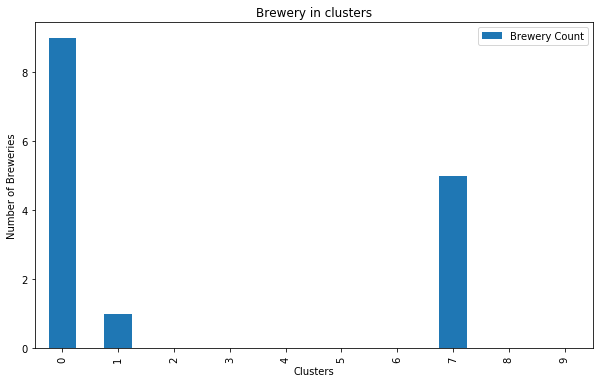

In [22]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

list_count_brewery=[]
for i, row in  (blr_merged.iterrows()):
    for j, col in enumerate(blr_merged.columns):
        #print(j,row['Cluster Labels'],row[col]=='Brewery')
        if(row[col]=='Brewery'):
            list_count_brewery.append({"Cluster Labels": row['Cluster Labels'],"Brewery Count":1})
        else:
            list_count_brewery.append({"Cluster Labels": row['Cluster Labels'],"Brewery Count":0})
df1 = pd.DataFrame(list_count_brewery)

blr_local_grouped_count = df1.groupby('Cluster Labels').sum().reset_index()
blr_local_grouped_count.set_index('Cluster Labels',inplace=True)
blr_local_grouped_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clusters') # add to x-label to the plot
plt.ylabel('Number of Breweries') # add y-label to the plot
plt.title('Brewery in clusters') # add title to the plot

plt.show()

#### How many Point of sales for liquor are available per cluster

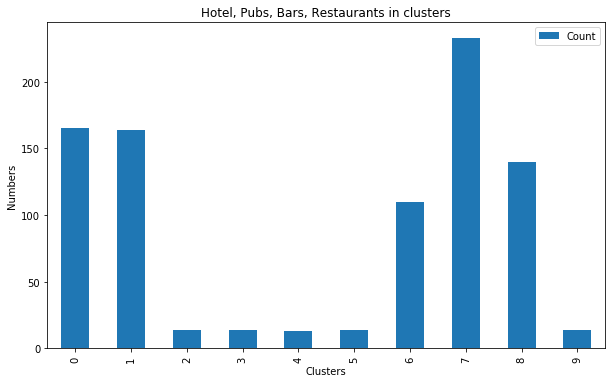

In [23]:
list_count_liq_venue=[]
for i, row in  (blr_merged.iterrows()):
    for j, col in enumerate(blr_merged.columns):
        #print(j,row['Cluster Labels'],row[col]=='Brewery')
        if(str(row[col]).find('Restaurant') or row[col]=='Hotel' or row[col]=='Pub' or row[col]=='Bar'): #row[col]=='Hotel' or row[col]=='Pub' or row[col]=='Bar'
            list_count_liq_venue.append({"Cluster Labels": row['Cluster Labels'],"Count":1})
        else:
            list_count_liq_venue.append({"Cluster Labels": row['Cluster Labels'],"Count":0})
df1 = pd.DataFrame(list_count_liq_venue)

blr_local_grouped_count = df1.groupby('Cluster Labels').sum().reset_index()
blr_local_grouped_count.set_index('Cluster Labels',inplace=True)
blr_local_grouped_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clusters') # add to x-label to the plot
plt.ylabel('Numbers') # add y-label to the plot
plt.title('Hotel, Pubs, Bars, Restaurants in clusters') # add title to the plot

plt.show()


#### Combined bar plot to see both the above statistics together in one bar graph

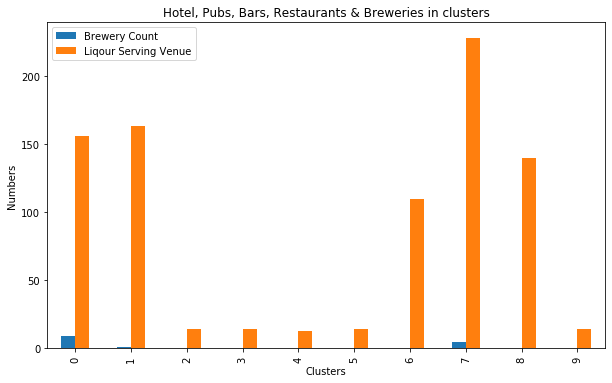

In [24]:
list_count=[]
for i, row in  (blr_merged.iterrows()):
    for j, col in enumerate(blr_merged.columns):
        #print(j,row['Cluster Labels'],row[col]=='Brewery')
        if(row[col]=='Brewery'):
            list_count.append({"Cluster Labels": row['Cluster Labels'],"Brewery Count":1,"Liqour Serving Venue":0})
            
        elif(str(row[col]).find('Restaurant') or row[col]=='Hotel' or row[col]=='Pub' or row[col]=='Bar'): 
            #row[col]=='Hotel' or row[col]=='Pub' or row[col]=='Bar'
            list_count.append({"Cluster Labels": row['Cluster Labels'],"Brewery Count":0,"Liqour Serving Venue":1})
                              
        else:
            list_count.append({"Cluster Labels": row['Cluster Labels'],"Brewery Count":0,"Liqour Serving Venue":0})
df_count = pd.DataFrame(list_count)

blr_local_grouped_count = df_count.groupby('Cluster Labels').sum().reset_index()
blr_local_grouped_count.set_index('Cluster Labels',inplace=True)
blr_local_grouped_count.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Clusters') # add to x-label to the plot
plt.ylabel('Numbers') # add y-label to the plot
plt.title('Hotel, Pubs, Bars, Restaurants & Breweries in clusters') # add title to the plot

plt.show()

#### Show the clusters on Map of Bangalore

In [25]:
# create map
blr_lat = 12.9716 
blr_long = 77.5946
map_clusters = folium.Map(location=[blr_lat, blr_long], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(blr_merged['Latitude'], blr_merged['Longitude'], blr_merged['Localities'], blr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save("Bangalore_Clusters.html")
map_clusters

###### *** Download "Bangalore_Clusters.html" file stored in the same folder to see the Map or see the image "Bangalore_Clusters_Image.png"

## Analyze the clusters based on map and top popular venues  in clusters

## Cluster 1
#### Very interesting cluster as it has lot of Restaurants, Hotels, Lounge and Pubs in it. Also, there are  lot of Breweries in this cluster and hence because of the existing competition this cluster is <b><u>not suitable to start a NEW setup.</u></b> But an <b><u>existing brewery can start distribution business</u></b> of Craft beer in this cluster.



In [26]:
blr_merged.loc[blr_merged['Cluster Labels'] == 0, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cantonment,0,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Pub,Brewery,Coffee Shop,Chinese Restaurant,Italian Restaurant,Steakhouse
1,Domlur,0,Pub,Café,Hotel,Ice Cream Shop,Indian Restaurant,Bar,Bakery,Brewery,Restaurant,Breakfast Spot
2,Indiranagar,0,Pub,Café,Ice Cream Shop,Indian Restaurant,Hotel,Bar,Cocktail Bar,Brewery,Burger Joint,Asian Restaurant
3,Jeevan bheema nagar,0,Indian Restaurant,Hotel,Ice Cream Shop,Bar,Pub,Café,Asian Restaurant,Brewery,Restaurant,Boutique
7,Shivajinagar,0,Indian Restaurant,Hotel,Ice Cream Shop,Pub,Lounge,Brewery,Chinese Restaurant,Italian Restaurant,Breakfast Spot,Park
8,Ulsoor,0,Pub,Hotel,Ice Cream Shop,Indian Restaurant,Café,Asian Restaurant,Brewery,Cocktail Bar,Department Store,Deli / Bodega
9,Vasanth Nagar,0,Indian Restaurant,Hotel,Pub,Lounge,Coffee Shop,Italian Restaurant,Brewery,Ice Cream Shop,Karnataka Restaurant,Café
10,Bellandur,0,Indian Restaurant,Hotel,Lounge,Ice Cream Shop,Pub,Brewery,Coffee Shop,Chinese Restaurant,Italian Restaurant,Steakhouse
11,C V Raman Nagar,0,Indian Restaurant,Ice Cream Shop,Café,Coffee Shop,Pub,Bar,Shopping Mall,Burger Joint,Italian Restaurant,Restaurant
22,Kammanahalli,0,Indian Restaurant,Ice Cream Shop,Pub,BBQ Joint,Café,Hotel,Bar,Bakery,Asian Restaurant,Department Store


## Cluster 2
#### Many Indian restaurants, Ice cream shops, continental food along with multiplex and resorts are there in this cluster. This cluster <b><u>could be choice to setup NEW Craft beer brewery with Dine In and Distribution</u></b> facility


In [27]:
blr_merged.loc[blr_merged['Cluster Labels'] == 1, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,RT Nagar,1,Indian Restaurant,Ice Cream Shop,Café,Italian Restaurant,Snack Place,Pub,Fast Food Restaurant,Chinese Restaurant,Hotel,Steakhouse
30,Vidyaranyapura,1,Indian Restaurant,Ice Cream Shop,Café,Pizza Place,Department Store,Dessert Shop,Coffee Shop,Resort,Italian Restaurant,Park
40,Banashankari,1,Indian Restaurant,Ice Cream Shop,Bakery,Breakfast Spot,Snack Place,Fast Food Restaurant,Coffee Shop,Restaurant,Café,Italian Restaurant
41,Basavanagudi,1,Indian Restaurant,Ice Cream Shop,Lounge,Italian Restaurant,Snack Place,Park,Breakfast Spot,Juice Bar,Fast Food Restaurant,Seafood Restaurant
42,Girinagar,1,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Café,Breakfast Spot,Snack Place,Sandwich Place,Restaurant,Bakery
43,J. P. Nagar,1,Indian Restaurant,Ice Cream Shop,Lounge,Café,Multiplex,Coffee Shop,Bakery,Breakfast Spot,Italian Restaurant,Fast Food Restaurant
44,Jayanagar,1,Indian Restaurant,Ice Cream Shop,Breakfast Spot,Snack Place,Fast Food Restaurant,Café,Bakery,Lounge,Park,Coffee Shop
45,Kumaraswamy Layout,1,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Restaurant,Coffee Shop,Italian Restaurant,Juice Bar,Bakery,South Indian Restaurant,Café
46,Padmanabhanagar,1,Indian Restaurant,Ice Cream Shop,Breakfast Spot,Fast Food Restaurant,Snack Place,Sandwich Place,Coffee Shop,Restaurant,Café,Juice Bar
52,Hulimavu,1,Indian Restaurant,Ice Cream Shop,Italian Restaurant,Coffee Shop,Snack Place,Café,Chinese Restaurant,Multiplex,Bakery,Brewery


## Cluster 3
#### Forest Area, Food Courts, Flea markets, so definitely this is out of scope.

In [28]:
blr_merged.loc[blr_merged['Cluster Labels'] == 2, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Bommanahalli,2,Forest,Food Court,Food & Drink Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Eastern European Restaurant


## Cluster 4
#### Athletics Sports, Mountain, Flea Market and Farmer Market. So definitely this is out of scope.

In [29]:
blr_merged.loc[blr_merged['Cluster Labels'] == 3, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Mahadevapura,3,Athletics & Sports,Vegetarian / Vegan Restaurant,Mountain,Donut Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store


## Cluster 5
#### Top 6 out of 10 popular venues are restaurant with no breweries in this cluster. So this cluster can be considered for <b><u>New setup with Dine In and distribution</u></b>


In [30]:
blr_merged.loc[blr_merged['Cluster Labels'] == 4, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,Koramangala,4,Indian Restaurant,Restaurant,Asian Restaurant,Yoga Studio,Dumpling Restaurant,Flea Market,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant


## Cluster 6
#### Popular venues are restaurants but no hotels, bars or pubs and Indian vegetarian restaurants do not serve beer. Also, Mountain, Flea Market and Farmer Market gives an indication that this cluster may <b><u>not suitable for Craft beer</u></b>.

In [31]:
blr_merged.loc[blr_merged['Cluster Labels'] == 5, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,Gottigere,5,Indian Restaurant,Vegetarian / Vegan Restaurant,Himalayan Restaurant,Mountain,Yoga Studio,Dumpling Restaurant,Flea Market,Field,Fast Food Restaurant,Farmers Market


## Cluster 7
#### Most popular venues are Indian restaurants, cafes , ice cream shops, fast food joints. New Brewery with <u>Dine In</u> could be an option in this cluster with the localities near the city center e.g. Kengeri and Bommasandra should be avoided

In [32]:
blr_merged.loc[blr_merged['Cluster Labels'] == 6, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Yelahanka,6,Indian Restaurant,Café,Lake,Ice Cream Shop,Burger Joint,Clothing Store,South Indian Restaurant,Department Store,Dessert Shop,Coffee Shop
34,Bommasandra,6,Indian Restaurant,Hotel,Café,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Diner,Market,Food Court,Sporting Goods Shop
47,Uttarahalli,6,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Breakfast Spot,Fast Food Restaurant,South Indian Restaurant,Bakery,Burger Joint,Chinese Restaurant
50,Begur,6,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Department Store,Dumpling Restaurant,Chinese Restaurant,Italian Restaurant,Tea Room
55,Kamakshipalya,6,Indian Restaurant,Café,Bakery,Fast Food Restaurant,Ice Cream Shop,Pizza Place,Gym,Seafood Restaurant,Vegetarian / Vegan Restaurant,Food Truck
56,Kengeri,6,Indian Restaurant,Café,Pizza Place,Bus Station,Food Court,Indian Chinese Restaurant,Nightclub,Burger Joint,Restaurant,Racetrack
60,Nayandahalli,6,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,Department Store,Breakfast Spot,Sandwich Place,Coffee Shop,Juice Bar,Burger Joint
62,Rajarajeshwari Nagar,6,Indian Restaurant,Café,Pizza Place,Breakfast Spot,Fast Food Restaurant,Bakery,Sandwich Place,Restaurant,Seafood Restaurant,Burger Joint


## Cluster 8
#### Most popular Restaurants, Hotels, Multiplexes, Lounges, BBQs and few Breweries are in this cluster. When you observe in the Map some of the localities are clustered very closely. This cluster can be <b><u>considered to set up a new Craft beer (dine in and distribution)</u></b> brewery at the localities which are situated away from the cluttered localities seen on the map.


In [33]:
blr_merged.loc[blr_merged['Cluster Labels'] == 7, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Hoodi,7,Indian Restaurant,Ice Cream Shop,Café,Hotel,Coffee Shop,Donut Shop,Restaurant,Bowling Alley,Brewery,Italian Restaurant
13,Krishnarajapuram,7,Indian Restaurant,Coffee Shop,Café,Hotel,Donut Shop,Pizza Place,Brewery,Clothing Store,Multiplex,Lounge
15,Marathahalli,7,Indian Restaurant,Café,Ice Cream Shop,Pizza Place,Restaurant,Hotel,Fast Food Restaurant,Sandwich Place,Coffee Shop,Bakery
16,Varthur,7,Indian Restaurant,Restaurant,Café,Pizza Place,Ice Cream Shop,Chinese Restaurant,Brewery,Sandwich Place,Bakery,Shopping Mall
17,Whitefield,7,Café,Restaurant,Indian Restaurant,Hotel,Ice Cream Shop,Pizza Place,Sandwich Place,Brewery,Shopping Mall,Coffee Shop
18,Banaswadi,7,Indian Restaurant,Café,Pizza Place,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Pub,Korean Restaurant,BBQ Joint,Italian Restaurant
19,HBR Layout,7,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,BBQ Joint,Bakery,Korean Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Lounge
20,Horamavu,7,Indian Restaurant,Pizza Place,Coffee Shop,BBQ Joint,Ice Cream Shop,Korean Restaurant,Bakery,Lounge,Chinese Restaurant,Burger Joint
21,Kalyan Nagar,7,Indian Restaurant,Café,Pizza Place,Fast Food Restaurant,BBQ Joint,Ice Cream Shop,Shopping Mall,Italian Restaurant,Korean Restaurant,Coffee Shop
24,Ramamurthy Nagar,7,Indian Restaurant,Coffee Shop,Café,Donut Shop,Korean Restaurant,Bakery,Pizza Place,Lounge,Ice Cream Shop,BBQ Joint


## Cluster 9
#### Lots of restaurants, multiplexes, shopping malls along with continental restaurants. This cluster do not have any Brewery so this cluster <b><u>can be considered to set up a new Craft beer </u></b>(dine in and distribution)

In [34]:
blr_merged.loc[blr_merged['Cluster Labels'] == 8, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Malleswaram,8,Indian Restaurant,Ice Cream Shop,Bakery,Hotel,Donut Shop,Fast Food Restaurant,Multiplex,Coffee Shop,Italian Restaurant,Lounge
5,Sadashivanagar,8,Indian Restaurant,Italian Restaurant,Ice Cream Shop,Lounge,Hotel,Coffee Shop,Seafood Restaurant,Multiplex,Pub,Shopping Mall
6,Seshadripuram,8,Indian Restaurant,Hotel,Lounge,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Multiplex,Breakfast Spot,Pub
26,Jalahalli,8,Indian Restaurant,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Italian Restaurant,Coffee Shop,Chinese Restaurant,Hotel,Café,Bar
27,Mathikere,8,Indian Restaurant,Ice Cream Shop,Italian Restaurant,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Hotel,Pizza Place,Bar,Bowling Alley
28,Peenya,8,Indian Restaurant,Pizza Place,Fast Food Restaurant,Italian Restaurant,Chinese Restaurant,Bowling Alley,Café,Lounge,Clothing Store,Hotel
32,Yeshwanthpur,8,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Donut Shop,Italian Restaurant,Bakery,Multiplex,Coffee Shop,Hotel,Chinese Restaurant
57,Mahalakshmi Layout,8,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Multiplex,Bakery,Donut Shop,Italian Restaurant,Bowling Alley,Clothing Store
59,Nandini Layout,8,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Bakery,Italian Restaurant,Multiplex,Coffee Shop,Donut Shop,Lounge,Seafood Restaurant
61,Rajajinagar,8,Indian Restaurant,Coffee Shop,Hotel,Multiplex,Bakery,Chinese Restaurant,Ice Cream Shop,Fast Food Restaurant,Shopping Mall,Bowling Alley


## Cluster 10
#### Popular places are restaurants but this cluster is away from city, not suitable for as it may not get big footfall.

In [35]:
blr_merged.loc[blr_merged['Cluster Labels'] == 9, blr_merged.columns[[0] + list(range(3, blr_merged.shape[1]))]]

,Localities,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,Anjanapura,9,Indian Restaurant,Pizza Place,South Indian Restaurant,Neighborhood,Dumpling Restaurant,Rajasthani Restaurant,Supermarket,Italian Restaurant,Asian Restaurant,Trail


## Final Analysis
#### Cluster 1 is suitable for existing breweries to start Distribution and not recommended to setup new Brewery as there are already many Breweries available

#### Cluster 7 is suitable for Dine In Only but at the localities near city center (as seen in map) to get enough footfall

#### Cluster 8 is suitable for Dine In and Distribution only at localities away from the cluttered part of cluster (i.e. avoid localities very near to each other as seen in map)

#### Cluster 2,5,9 are suitable for Dine In purpose as there no Breweries in these clusters, but there are not much distribution options as number of liquor serving venues are not much

#### Rest of the clusters are not recommended for setting up breweries.
